# OCR 실습

In [53]:
import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt

In [54]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c'

In [55]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/'

In [56]:
ocr_url = vision_base_url + 'ocr'

## 분석할 이미지를 셋팅 한다.

In [57]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png'

In [58]:
img = Image.open(BytesIO(requests.get(image_url).content))

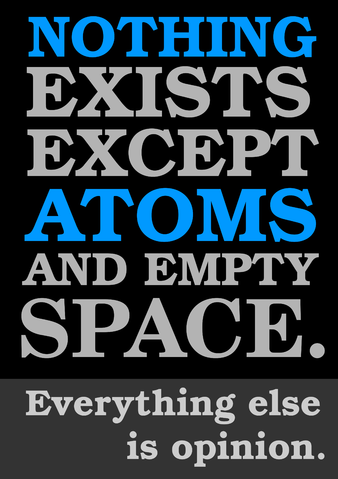

In [59]:
img

In [60]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'unk', 'detectOrientation': 'true'}                #unk(unknown), detectOrientation(이미지 바로 세우기)
data    = {'url': image_url}

In [61]:
response = requests.post(ocr_url,
                        headers=headers,
                        params=params,
                        json=data)

In [62]:
analysis = response.json()                                                

In [63]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '21,16,304,451',
   'lines': [{'boundingBox': '28,16,288,41',
     'words': [{'boundingBox': '28,16,288,41', 'text': 'NOTHING'}]},
    {'boundingBox': '27,66,283,52',
     'words': [{'boundingBox': '27,66,283,52', 'text': 'EXISTS'}]},
    {'boundingBox': '27,128,292,49',
     'words': [{'boundingBox': '27,128,292,49', 'text': 'EXCEPT'}]},
    {'boundingBox': '24,188,292,54',
     'words': [{'boundingBox': '24,188,292,54', 'text': 'ATOMS'}]},
    {'boundingBox': '22,253,297,32',
     'words': [{'boundingBox': '22,253,105,32', 'text': 'AND'},
      {'boundingBox': '144,253,175,32', 'text': 'EMPTY'}]},
    {'boundingBox': '21,298,304,60',
     'words': [{'boundingBox': '21,298,304,60', 'text': 'SPACE.'}]},
    {'boundingBox': '26,387,294,37',
     'words': [{'boundingBox': '26,387,210,37', 'text': 'Everything'},
      {'boundingBox': '249,389,71,27', 'text': 'else'}]},
    {'boundingBox': '127,431,198

In [65]:
line_infos = [region["lines"] for region in analysis["regions"]]          
#for문 먼저 반복해서 배열만들고, 그 배열[region]에서 또 배열로 따로 빼서 변수에 넣기

word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '28,16,288,41', 'text': 'NOTHING'},
 {'boundingBox': '27,66,283,52', 'text': 'EXISTS'},
 {'boundingBox': '27,128,292,49', 'text': 'EXCEPT'},
 {'boundingBox': '24,188,292,54', 'text': 'ATOMS'},
 {'boundingBox': '22,253,105,32', 'text': 'AND'},
 {'boundingBox': '144,253,175,32', 'text': 'EMPTY'},
 {'boundingBox': '21,298,304,60', 'text': 'SPACE.'},
 {'boundingBox': '26,387,210,37', 'text': 'Everything'},
 {'boundingBox': '249,389,71,27', 'text': 'else'},
 {'boundingBox': '127,431,31,29', 'text': 'is'},
 {'boundingBox': '172,431,153,36', 'text': 'opinion.'}]